# **Clusterização de clientes**

**Objetivo do Projeto:**

O objetivo deste projeto é aplicar os conceitos aprendidos nos módulos de conceitos avançados de modelagem para realizar uma segmentação de clientes utilizando o algoritmo de clustering K-Means.

**O dataset a ser utilizado neste projeto contém informações de 200 clientes, com os seguintes atributos:**

CustomerID: Identificador único atribuído a cada cliente.

Gender: Gênero do cliente.

Age: Idade do cliente.

Annual Income (k$): Renda anual do cliente em milhares de dólares.

Spending Score (1-100): Pontuação atribuída pelo shopping com base no
comportamento e padrão de gastos do cliente.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

#Exploração dos dados

In [ ]:
df_zero = pd.read_csv('Mall_Customers.csv') #importação do DataFrame

df_zero.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df_zero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Note que não há dados ausentes, no entanto a variável Gender pode ter insconsistências. Verificaremos com a ferramenta .unique.

In [ ]:
df_zero['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Nenhum problema identificado na variável Gender.

Alguma codificação foi feita para essa variável durante a construção do projeto, no entanto concluimos que não seria relevante para clusterização do nosso modelo.

In [ ]:
df = df_zero.drop(['Gender', 'CustomerID'], axis=1) #Remoção das variáveis não utilizadas na clusterização.
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Considerando que as médias estão relativamente próximas da mediana, acreditamos que a presença de outliers não seja tão expressiva. No entanto, faremos a verificação.

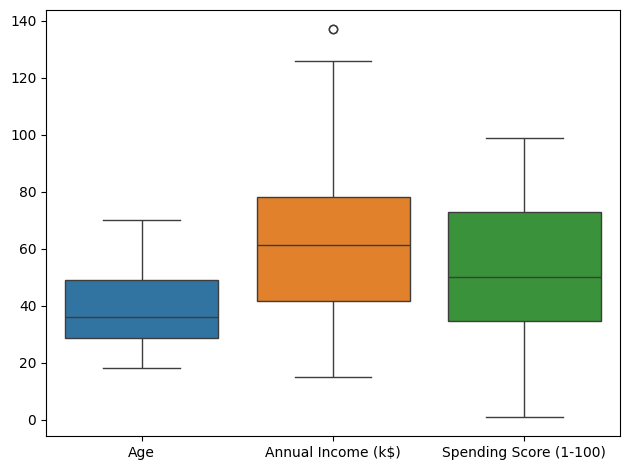

In [ ]:
sns.boxplot(data=df) #Visualização de outliers.
plt.tight_layout()
plt.show()

Optamos por não remover o unico dado apontado como outlier pois é um salário anual possível.

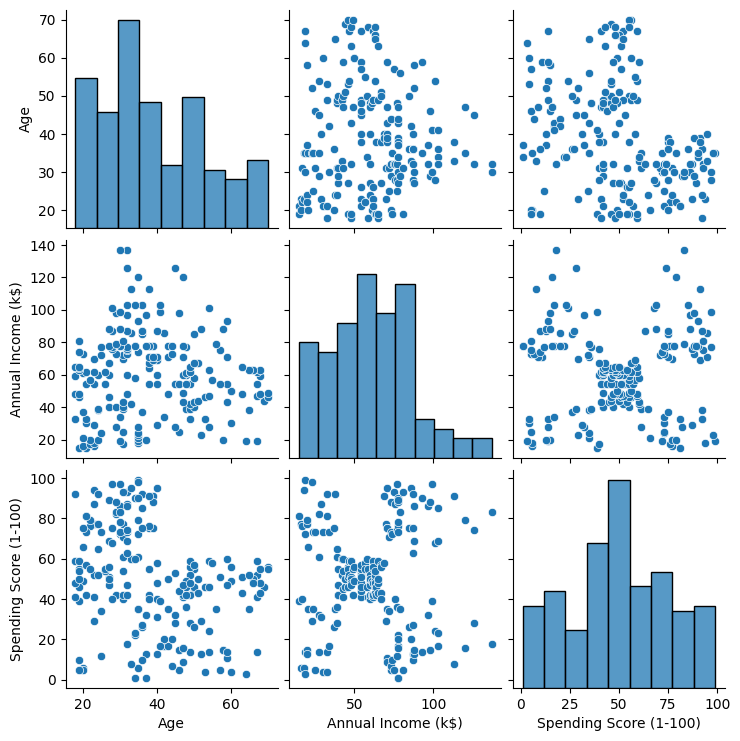

In [ ]:
sns.pairplot(df) #Visualização da relação entre os dados
plt.show()

Algumas observações podem ser feitas:

Os scores mais altos estão com pessoas até 40 anos

Identificamos pelo menos 5 grupos de pessoas com scores e renda anual parecidos

as maiores rendas anuais estão entre pessoas de 3 a 50 anos.

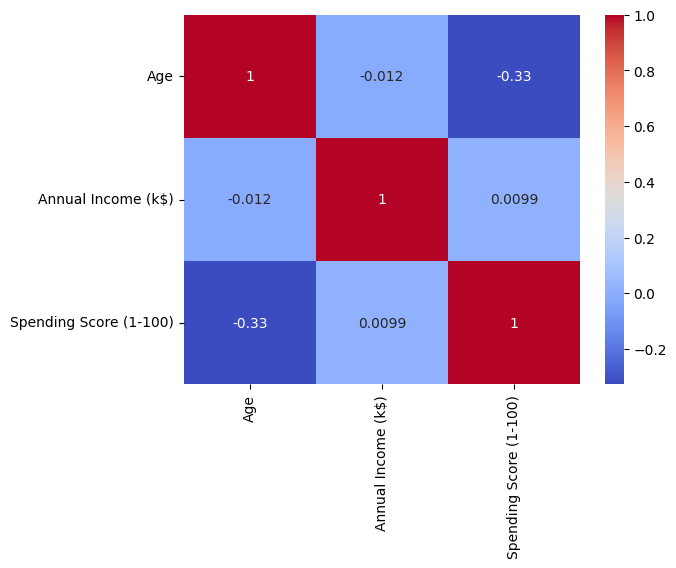

In [ ]:
correlation_matrix = df.corr() #Matriz correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Há pouca correlação entre os dados. A maior entre elas é a entre idade e Score, com -33% de correlação.

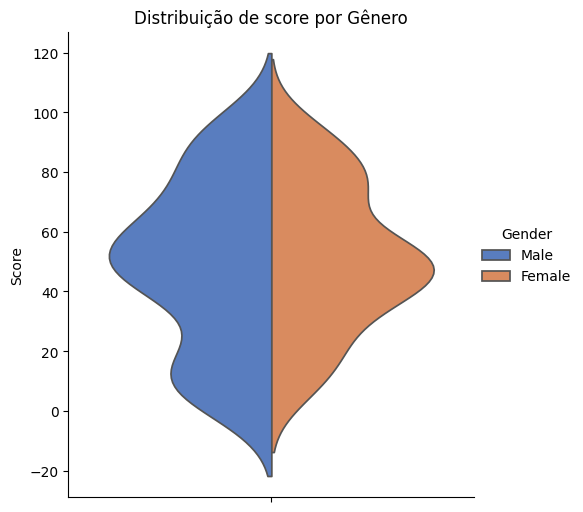

In [ ]:
#Visualização da correlação entre score e gênero
g = sns.catplot(y = 'Spending Score (1-100)', hue = 'Gender', data = df_zero, kind = 'violin', split = True, palette='muted', inner = None)
plt.ylabel('Score')
plt.title('Distribuição de score por Gênero')

plt.show()

Uma distruibuição equilibrada com algumas considerações. Os scores mais baixos são mais presentes entre os homens e a maior parte das pessoas tem score entre 40 e 60.

#Tratamento dos dados

Nessa etapa não foi necessaária a remoção de outliers e preenchimento de dados faltantes, apenas a padronização dos dados.

In [ ]:
scaler = StandardScaler() #Padronização dos dados
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
print(df_scaled)

          Age  Annual Income (k$)  Spending Score (1-100)
0   -1.424569           -1.738999               -0.434801
1   -1.281035           -1.738999                1.195704
2   -1.352802           -1.700830               -1.715913
3   -1.137502           -1.700830                1.040418
4   -0.563369           -1.662660               -0.395980
..        ...                 ...                     ...
195 -0.276302            2.268791                1.118061
196  0.441365            2.497807               -0.861839
197 -0.491602            2.497807                0.923953
198 -0.491602            2.917671               -1.250054
199 -0.635135            2.917671                1.273347

[200 rows x 3 columns]


#Implementação do algoritmo K-means

In [ ]:
kmeans = KMeans (n_clusters=5, n_init = 100, random_state=42) #Aplicação do algoritmo nos dados padronizados
kmeans.fit(df_scaled)

KMeans(n_clusters=5, n_init=100, random_state=42)

Após algumas iterações com o número de clusters entre 3 e 7, acreditamos que o que melhor se enquadra é o apresentado.

In [ ]:
centroides = kmeans.cluster_centers_ #Revelando os cetróides padronizados
centroides

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.98067852, -0.74305983,  0.46744035],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675],
       [ 1.20484056, -0.23577338, -0.05236781]])

In [ ]:
centroides_despadronizados = scaler.inverse_transform(centroides) #'despadronizando' os centróides
centroides_despadronizados

array([[46.25      , 26.75      , 18.35      ],
       [25.18518519, 41.09259259, 62.24074074],
       [32.875     , 86.1       , 81.525     ],
       [39.87179487, 86.1025641 , 19.35897436],
       [55.63829787, 54.38297872, 48.85106383]])

In [ ]:
labels = kmeans.labels_ #classes dos clientes
labels

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 3, 1, 1, 1, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

#Avaliação e interpretação dos resultados

Os dados parecem se enquadrar bem no numero de cluster proposto, apenas o grupo 1 poderia estar mais isolado na relação entre score e renda anual.

In [ ]:
df_clusters = pd.DataFrame({
    'Idade': df['Age'],
    'Renda Anual': df['Annual Income (k$)'],
    'Score': df['Spending Score (1-100)'],
    'cluster': labels.astype(str)
})

In [ ]:
fig = px.scatter(
    df_clusters,
    x='Score',
    y='Renda Anual',
    color='cluster',
    title='Clusterização dos clientes considerando Score e Renda Anual',
)

fig.add_scatter(
    x=centroides_despadronizados[:, 2],
    y=centroides_despadronizados[:, 1],
    mode='markers',
    marker=dict(color='black', symbol = 'x', size=10),
    name='Centroides',
)
fig.show()

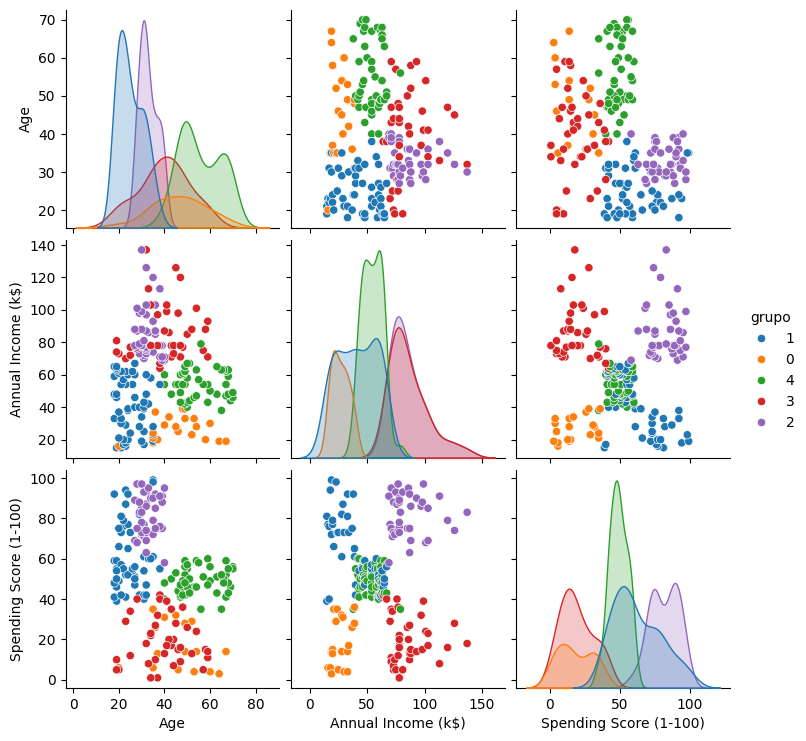

In [ ]:
df['grupo'] = kmeans.labels_.astype('str')
sns.pairplot(df, hue = 'grupo')

In [ ]:
df['cluster'] = labels
media_por_grupos = df.groupby('cluster')[['Spending Score (1-100)', 'Annual Income (k$)']].mean()
print(media_por_grupos)

         Spending Score (1-100)  Annual Income (k$)
cluster                                            
0                     18.350000           26.750000
1                     62.240741           41.092593
2                     81.525000           86.100000
3                     19.358974           86.102564
4                     48.851064           54.382979


#Considerações
O grupo 0 são as pessoas com menor score e renda anual mais baixa, parecem ser clientes pouco propensos a realizar comprar.
O grupo 1 tem scores mais altos mas com renda anual baixa e média, parecem ser bons consumidores mas com menos responsabilidade.
O grupo 2 são os clientes com os maiores scores e maior renda anual, possivelmente o publico alvo para campanhas de marketing.
O grupo 3 possue altas rendas anuais mas pouco propensos a realizar compras.
o grupo 4 possue uma renda anual média e um score médio, são possiveis clientes com poder aquisitivo de acordo com seu score.

Em uma classificação de grupos alvos para realização de campanhas poderiamos classificar na ordem 2, 1, 4, 3 e 0.